In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
test_scaled = test_input / 255.0

# train_test split
train_scaled, valid_scaled, train_target, valid_target = train_test_split(
  train_scaled, train_target, test_size=0.2, random_state=13
)

#### 모델 만들기를 함수로 만들어놓기

In [4]:
# model 함수 구현
def build_model(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=[28, 28]))
  model.add(keras.layers.Dense(100, activation='relu'))

  if a_layer is not None:
    model.add(a_layer)
  
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [5]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


2022-07-20 15:40:35.829455: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.compile(
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)
history = model.fit(
  train_scaled, train_target,
  epochs=5,
)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5274 - accuracy: 0.8131
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3907 - accuracy: 0.8581
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3573 - accuracy: 0.8720
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3371 - accuracy: 0.8800
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3202 - accuracy: 0.8879


In [7]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

---
## 손실곡선을 그려보자

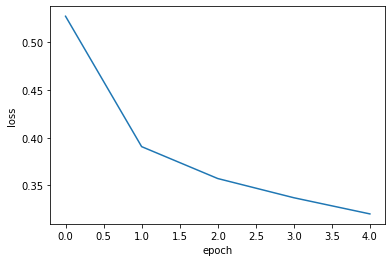

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

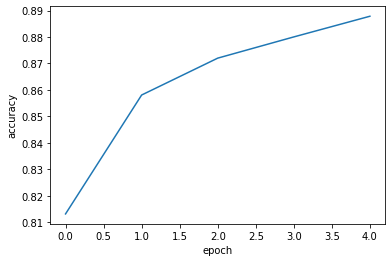

In [10]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

---
## epoch를 증가시켜보자

In [11]:
model = build_model()
model.compile(
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)
history = model.fit(
  train_scaled, train_target,
  epochs=20 
)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5271 - accuracy: 0.8136
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3902 - accuracy: 0.8604
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3542 - accuracy: 0.8725
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3338 - accuracy: 0.8799
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3210 - accuracy: 0.8842
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3088 - accuracy: 0.8906
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2985 - accuracy: 0.8948
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2925 - accuracy: 0.8977
Epoch 9/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2871 - accuracy: 0.8996
Epoch 10/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.279

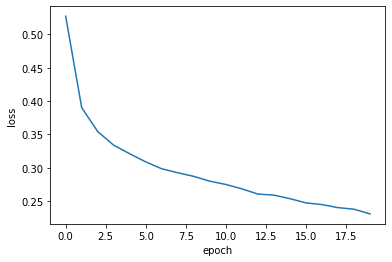

In [12]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

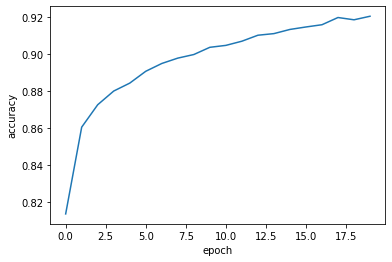

In [13]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

---
## 검증 손실
: 검증 세트에 대한 정확도를 파악하기 위해 validation data를 사용한다.

In [14]:
model = build_model()
model.compile(
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)
# fit 할 때 validation을 같이 할 수 있음
history = model.fit(
  train_scaled, train_target,
  epochs=20,
  validation_data=(valid_scaled, valid_target)
)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5295 - accuracy: 0.8142 - val_loss: 0.4201 - val_accuracy: 0.8510
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3919 - accuracy: 0.8578 - val_loss: 0.3805 - val_accuracy: 0.8666
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3568 - accuracy: 0.8725 - val_loss: 0.3755 - val_accuracy: 0.8693
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3332 - accuracy: 0.8815 - val_loss: 0.3571 - val_accuracy: 0.8759
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3185 - accuracy: 0.8883 - val_loss: 0.3675 - val_accuracy: 0.8752
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3079 - accuracy: 0.8905 - val_loss: 0.3681 - val_accuracy: 0.8801
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3005 - accuracy: 0.8951 - val_loss: 0.3580 - val_accuracy:

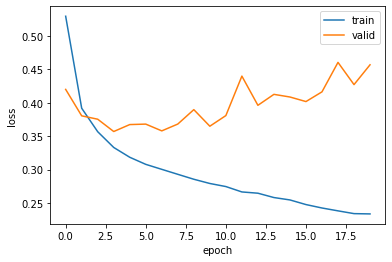

In [18]:
# validation과 accuracy 그래프 같이 그려보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'valid'])
plt.show()

#### epoch에 따라 train의 loss는 계속해서 줄어드는데 valid의 loss는 좀 줄다가 안 줄어들어
> 매우매우 과대적합

---
## Optimizer를 써보자

#### adam

In [19]:
model = build_model()
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)
# fit 할 때 validation을 같이 할 수 있음
history = model.fit(
  train_scaled, train_target,
  epochs=20,
  validation_data=(valid_scaled, valid_target)
)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5243 - accuracy: 0.8171 - val_loss: 0.4444 - val_accuracy: 0.8461
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3990 - accuracy: 0.8573 - val_loss: 0.3949 - val_accuracy: 0.8618
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3596 - accuracy: 0.8697 - val_loss: 0.3678 - val_accuracy: 0.8674
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3303 - accuracy: 0.8802 - val_loss: 0.3627 - val_accuracy: 0.8700
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3099 - accuracy: 0.8862 - val_loss: 0.3575 - val_accuracy: 0.8698
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2954 - accuracy: 0.8910 - val_loss: 0.3593 - val_accuracy: 0.8685
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2837 - accuracy: 0.8950 - val_loss: 0.3387 - val_accuracy:

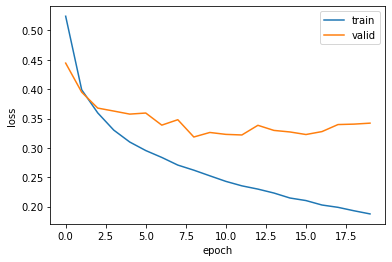

In [20]:
# validation과 accuracy 그래프 같이 그려보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'valid'])
plt.show()

##### 쬐끔 낫긴 한데 마음에 들지 않음

> 훈련세트는 epochs가 증가함에 따라 손실이 줄고 있으으나   
> 검증세트는 epochs의 증가에 따라 초반에서는 손실이 떨어지나 뒤로 갈 수록 정도가 미미하다   
> 여전히 검증세트에는 적합하지 않는 과대적합 모델이다.   
> Optimizer를 쓰기 전보다 조금 더 나아졌으나 검증손실은 해결이 안 되고 있다
> 머신러닝에서는 L1, L2 규제로 해결한다.   
> 지금과 같은 딥러닝에서는 Dropout을 사용한다

---
# Dropout
- 딥러닝에서의 규제
- 신경망 모델에만 있음
- 훈련 시에만, 각 샘플을 처리할 때 은닉층의 임의의 node를 계산에서 제외한다

In [21]:
# model에 dropout을 추가해보자
model = build_model(keras.layers.Dropout(0.3)) # 30% dropout
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


##### dropout 층이 맨 끝 전에 추가된 것을 볼 수 있다

In [22]:
# compile
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)
history = model.fit(
  train_scaled, train_target,
  epochs=20,
  validation_data=(valid_scaled, valid_target)
)

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5981 - accuracy: 0.7887 - val_loss: 0.4449 - val_accuracy: 0.8416
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4429 - accuracy: 0.8403 - val_loss: 0.3986 - val_accuracy: 0.8579
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4058 - accuracy: 0.8518 - val_loss: 0.3791 - val_accuracy: 0.8652
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3833 - accuracy: 0.8583 - val_loss: 0.3706 - val_accuracy: 0.8657
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3685 - accuracy: 0.8653 - val_loss: 0.3627 - val_accuracy: 0.8692
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3587 - accuracy: 0.8671 - val_loss: 0.3505 - val_accuracy: 0.8723
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3439 - accuracy: 0.8735 - val_loss: 0.3398 - val_accuracy:

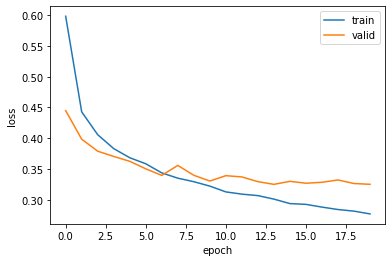

In [23]:
# validation과 accuracy 그래프 같이 그려보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'valid'])
plt.show()

> epoch 9정도에서 train과 val의 차이가 적게 나온다(달라질 수 있음)   
> 기본적으로 훈련세트의 손실이 검증보다 적게 나오면서 그 차이가 적은 epoch의 갯수를 선택한다   

---
## 모델을 파일로 저장하고 복원한다
- hdf5 포맷을 사용한다

In [25]:
# 파일로 저장하기
model.save('data/model_whole.h5')

In [26]:
# 저장한 모델 불러오기
model = keras.models.load_model('data/model_whole.h5')

In [27]:
# 사용해보기
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.3492 - accuracy: 0.8823


[0.34923073649406433, 0.8823000192642212]

---
# Callback 함수
##### 훈련 수행 시 손실값이 제일 작은 함수를 저장해 준다. -> 굉장히 편함

In [29]:
model = build_model(keras.layers.Dropout(0.3)) # 30% dropout
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)
checkpoint_callback = keras.callbacks.ModelCheckpoint(
  'data/model_best.h5',
  monitor='val_loss',
  verbose=1,
  save_best_only=True,
  mode='min'
)

model.fit(
  train_scaled, train_target,
  epochs=20,
  validation_data=(valid_scaled, valid_target),
  callbacks=[checkpoint_callback]
)

Epoch 1/20
1489/1500 [============================>.] - ETA: 0s - loss: 0.5851 - accuracy: 0.7931
Epoch 1: val_loss improved from inf to 0.43574, saving model to data/model_best.h5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5847 - accuracy: 0.7931 - val_loss: 0.4357 - val_accuracy: 0.8426
Epoch 2/20
1498/1500 [============================>.] - ETA: 0s - loss: 0.4313 - accuracy: 0.8454
Epoch 2: val_loss improved from 0.43574 to 0.39471, saving model to data/model_best.h5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4314 - accuracy: 0.8453 - val_loss: 0.3947 - val_accuracy: 0.8533
Epoch 3/20
1495/1500 [============================>.] - ETA: 0s - loss: 0.3977 - accuracy: 0.8557
Epoch 3: val_loss improved from 0.39471 to 0.37329, saving model to data/model_best.h5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3976 - accuracy: 0.8558 - val_loss: 0.3733 - val_accuracy: 0.8622
Epoch 4/20
1481/1500 [============================

In [30]:
model = keras.models.load_model('data/model_best.h5')
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.3401 - accuracy: 0.8801


[0.3401472270488739, 0.8801000118255615]

---
# Early-Stopping(조기종료)
##### Callbacks처럼 끝까지 기다리는 것이 아니고 hyper parameter를 선정해 한계값을 정해 실행
##### 특정 조건을 만족하면 조기종료

In [32]:
# early stopping
model = build_model(keras.layers.Dropout(0.3)) # 30% dropout
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)
checkpoint_callback = keras.callbacks.ModelCheckpoint(
  'data/model_best.h5',
  monitor='val_loss',
  verbose=1,
  save_best_only=True,
  mode='min'
)
early_stopping_callback = keras.callbacks.EarlyStopping(
  monitor='val_loss',
  patience=2, # val_loss가 2번까지 올라가도 참아줌
  verbose=1,
  mode='min',
  restore_best_weights=True # 없으면 손실이 증가한 채로 저장되어버림
)
history = model.fit(
  train_scaled, train_target,
  epochs=20,
  validation_data=(valid_scaled, valid_target),
  callbacks=[checkpoint_callback, early_stopping_callback]
)

Epoch 1/20
1486/1500 [============================>.] - ETA: 0s - loss: 0.5943 - accuracy: 0.7921
Epoch 1: val_loss improved from inf to 0.43300, saving model to data/model_best.h5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5939 - accuracy: 0.7923 - val_loss: 0.4330 - val_accuracy: 0.8453
Epoch 2/20
1494/1500 [============================>.] - ETA: 0s - loss: 0.4407 - accuracy: 0.8401
Epoch 2: val_loss improved from 0.43300 to 0.38997, saving model to data/model_best.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4408 - accuracy: 0.8401 - val_loss: 0.3900 - val_accuracy: 0.8583
Epoch 3/20
1478/1500 [============================>.] - ETA: 0s - loss: 0.4049 - accuracy: 0.8533
Epoch 3: val_loss improved from 0.38997 to 0.38686, saving model to data/model_best.h5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4045 - accuracy: 0.8534 - val_loss: 0.3869 - val_accuracy: 0.8579
Epoch 4/20
1493/1500 [============================

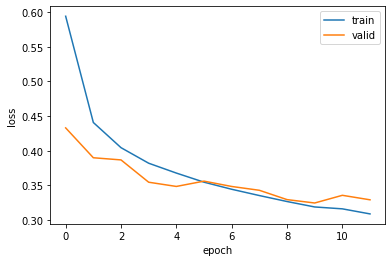

In [33]:
# validation과 accuracy 그래프 같이 그려보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'valid'])
plt.show()